In [ ]:
# Dataset link 
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

from scipy.stats import chi2_contingency
import os

In [101]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [102]:
# Train test split
X = df.drop('Class',axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [103]:
# 5 point summary
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,190820.0,94726.385505,47480.732263,0.000000,54138.500000,84585.000000,139244.250000,172792.000000
V1,190820.0,-0.003055,1.961218,-56.407510,-0.922406,0.011561,1.313760,2.454930
V2,190820.0,-0.002303,1.667863,-72.715728,-0.599570,0.067177,0.802685,22.057729
V3,190820.0,0.002946,1.514610,-48.325589,-0.884425,0.183873,1.029155,4.187811
V4,190820.0,-0.000183,1.417862,-5.683171,-0.849937,-0.021245,0.742265,16.875344
V5,190820.0,0.000247,1.395951,-113.743307,-0.689221,-0.056669,0.608841,34.801666
V6,190820.0,-0.001871,1.337677,-26.160506,-0.767879,-0.273700,0.393957,73.301626
V7,190820.0,0.001951,1.251790,-43.557242,-0.551411,0.042334,0.570371,120.589494
V8,190820.0,-0.000004,1.189600,-73.216718,-0.207132,0.022506,0.327317,20.007208
V9,190820.0,-0.000648,1.096771,-13.320155,-0.642912,-0.051165,0.597188,10.348407


In [104]:
# Missing and duplicate values analysis
print("Duplicates : ",X_train.duplicated().sum())
print("Missing : ",X_train.isna().sum().sum())

Duplicates :  510
Missing :  0


In [105]:
# Scaling 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),index=X_train.index,columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),index=X_test.index,columns = X_test.columns)



In [106]:
# correlation matrix
tab=pd.concat([X_train,y_train],axis=1).corr()['Class'].reset_index()
for i,j in zip(tab['index'],tab['Class']):
    if (j<-0.1) | (j>0.1):
        print(i,j)
    else:
        pass
   

V3 -0.18825221693408664
V4 0.13594364233011635
V7 -0.1752625700689382
V10 -0.21200411728471877
V11 0.1561790854932074
V12 -0.26198194399129404
V14 -0.3059194289730593
V16 -0.1911420599431628
V17 -0.3156983261596013
V18 -0.10532779398423427
Class 1.0


In [107]:
# Feature selection
def feature_selection(df):
    l = ['V3','V4','V7','V10','V11','V12','V14','V16','V17','V18']
    return df[l]

X_train = feature_selection(X_train)
X_test = feature_selection(X_test)

In [108]:
# Modeling
clf = RandomForestClassifier(random_state=11,verbose=2)
clf.fit(X_train,y_train)
print("train score r2: ",clf.score(X_train,y_train))

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.1min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.5s


train score r2:  1.0


In [123]:
y_pred = clf.predict(X_test)
cr = classification_report(y_test,y_pred)


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


In [124]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.95      0.81      0.87       149

    accuracy                           1.00     93987
   macro avg       0.97      0.91      0.94     93987
weighted avg       1.00      1.00      1.00     93987



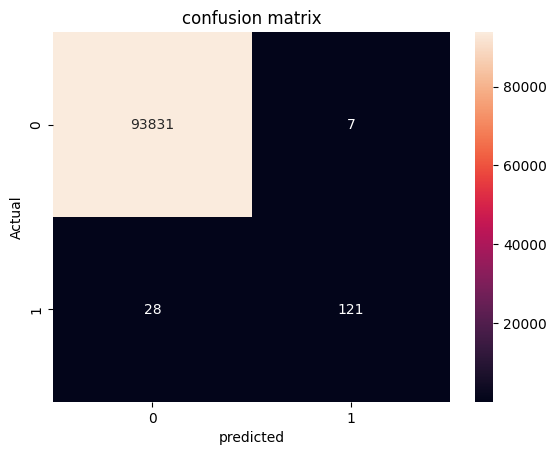

In [122]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.savefig("Images/confusion_matrix.jpeg")
plt.show()
